In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
x=pd.read_csv("/content/Titanic-Dataset.csv")

In [40]:
x.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
x.shape

(891, 12)

In [42]:
x.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
x.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.900,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.050,NaN,S
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.000,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S


In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
x.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
#rows with  null
#any axis

In [48]:
x=x.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [49]:
x['Embarked'] = x['Embarked'].fillna(x['Embarked'].mode()[0])
x['Age'] = x['Age'].fillna(x['Age'].mean())

In [50]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [51]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder(sparse_output=False)
x['Sex']=ohe.fit_transform(x[['Sex']])
x['Embarked']=le.fit_transform(x['Embarked'])

In [52]:
x.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,2
1,1,1,1.0,38.0,1,0,71.2833,0


In [53]:
x['Parch'].unique()
x['SibSp'].unique()
x['Pclass'].unique()
x['Age'].unique()
x['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

<Axes: xlabel='Age'>

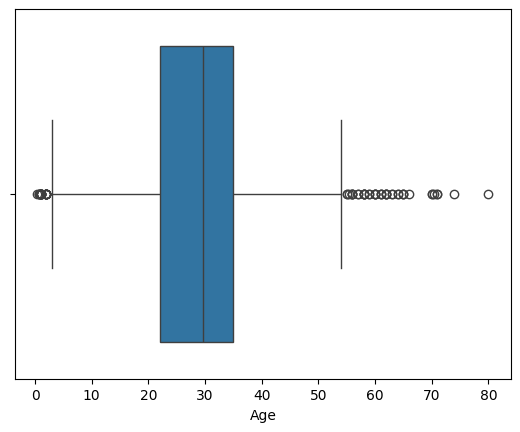

In [54]:
sns.boxplot(x=x['Age'])



<Axes: xlabel='Fare'>

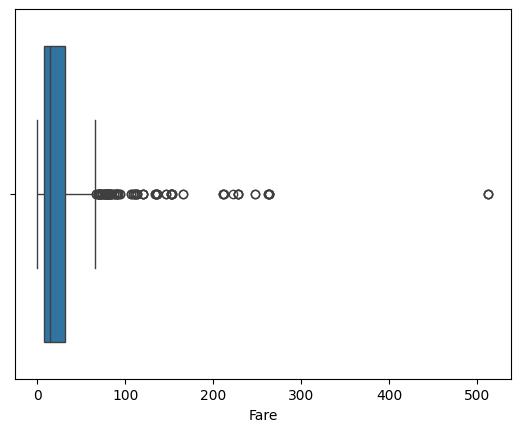

In [55]:
sns.boxplot(x=x['Fare'])

In [56]:
q1=x['Age'].quantile(0.25)
q3=x['Age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
x=x[(x['Age']>=lower_bound) & (x['Age']<=upper_bound)]

In [57]:
q1=x['Fare'].quantile(0.25)
q3=x['Fare'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
x=x[(x['Fare']>=lower_bound) & (x['Fare']<=upper_bound)]

In [58]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.000000,1,0,7.2500,2
2,1,3,1.0,26.000000,0,0,7.9250,2
3,1,1,1.0,35.000000,1,0,53.1000,2
4,0,3,0.0,35.000000,0,0,8.0500,2
5,0,3,0.0,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
886,0,2,0.0,27.000000,0,0,13.0000,2
887,1,1,1.0,19.000000,0,0,30.0000,2
888,0,3,1.0,29.699118,1,2,23.4500,2
889,1,1,0.0,26.000000,0,0,30.0000,0


In [60]:
x.shape

(718, 8)

<Axes: xlabel='Age', ylabel='Fare'>

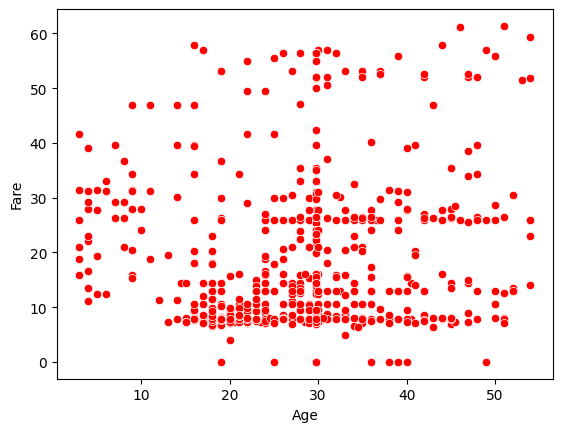

In [62]:
sns.scatterplot(x='Age',y='Fare',data=x,color='red')

/tmp/ipython-input-74-1727611235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['Fare'],kde=True)


Text(0.5, 1.0, 'Fare Distribution')

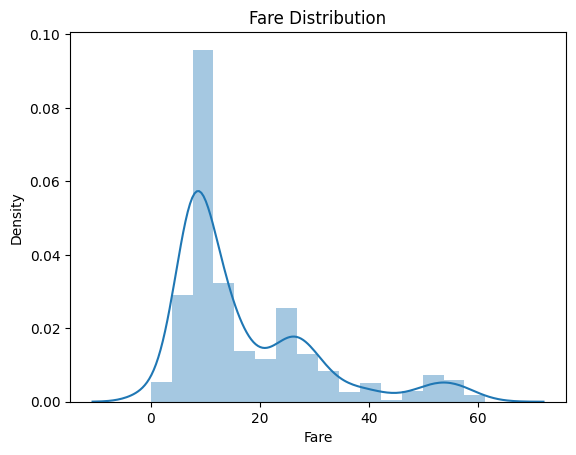

In [74]:
sns.distplot(x['Fare'],kde=True)
plt.title('Fare Distribution')

<Axes: xlabel='Age', ylabel='Count'>

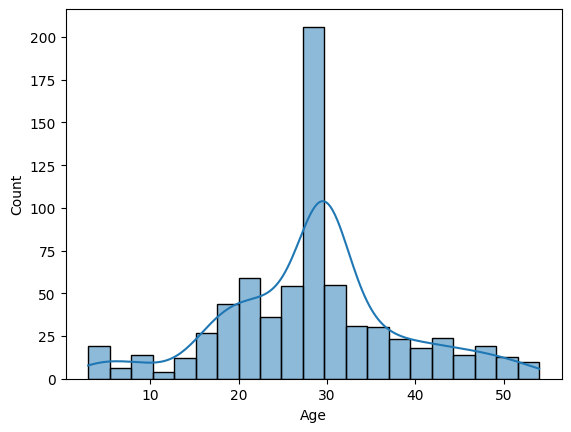

In [73]:
sns.histplot(x['Age'],kde=True)
plt.title('Age Distribution')

<Axes: xlabel='Sex', ylabel='Survived'>

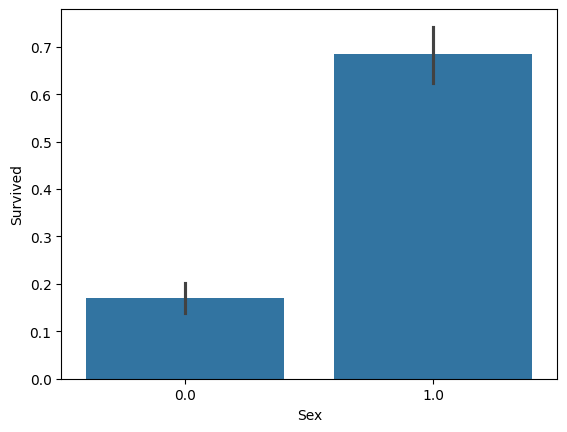

In [75]:
sns.barplot(x='Sex',y='Survived',data=x)
plt.title('Sex vs Survived')

Text(0.5, 1.0, 'Which class survived the most and fare')

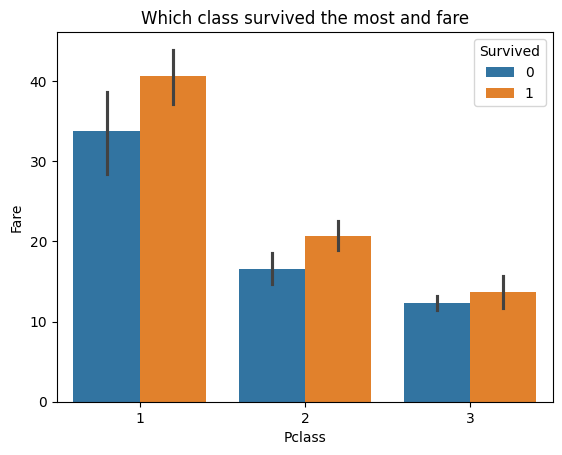

In [76]:
sns.barplot(x='Pclass',y='Fare',data=x,hue='Survived')
plt.title('Which class survived the most and fare')

In [80]:
from sklearn.model_selection import train_test_split
feat=x.drop(columns=['Survived'])
target=x['Survived']
xtr,xte,ytr,yte=train_test_split(feat,target,test_size=0.2,random_state=42)

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=7)
dtc.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=7)

In [115]:
pred=dtc.predict(xte)
accuracy=dtc.score(xte,yte)
print(accuracy)

0.8055555555555556


[Text(0.5206866197183099, 0.9375, 'x[1] <= 0.5\ngini = 0.444\nsamples = 574\nvalue = [383, 191]'),
 Text(0.2640845070422535, 0.8125, 'x[5] <= 26.269\ngini = 0.282\nsamples = 394\nvalue = [327, 67]'),
 Text(0.3923855633802817, 0.875, 'True  '),
 Text(0.14788732394366197, 0.6875, 'x[2] <= 13.5\ngini = 0.214\nsamples = 320\nvalue = [281, 39]'),
 Text(0.13380281690140844, 0.5625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.1619718309859155, 0.5625, 'x[6] <= 0.5\ngini = 0.193\nsamples = 315\nvalue = [281, 34]'),
 Text(0.09154929577464789, 0.4375, 'x[5] <= 15.148\ngini = 0.349\nsamples = 40\nvalue = [31, 9]'),
 Text(0.056338028169014086, 0.3125, 'x[2] <= 22.5\ngini = 0.245\nsamples = 35\nvalue = [30, 5]'),
 Text(0.028169014084507043, 0.1875, 'x[4] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.014084507042253521, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04225352112676056, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08450704225352113, 0.1

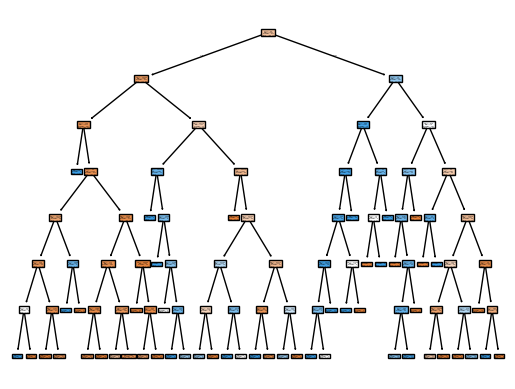

In [117]:
from sklearn.tree import plot_tree
plot_tree(dtc,filled=True)